In [1]:
import sys                       
sys.path.append('../scripts/')
from robot import *
from scipy.stats import uniform, norm

In [2]:
class RandomRobot(Robot): ###biased_random_robot### noiseメソッドは省略で
        
    def __init__(self, pose, agent=None, sensor=None, color="black", \
                           noise_prob=0.1, noise_stderr=math.pi/60, bias_rates=(0.1,0.1)):  #bias_ratesを追加#
        super().__init__(pose, agent, sensor, color)
        self.noise_prob = noise_prob
        self.noise_stderr = noise_stderr
        self.bias_rate_nu = norm.rvs(loc=1.0, scale=bias_rates[0])          #追加
        self.bias_rate_omega = norm.rvs(loc=1.0, scale=bias_rates[1])  #追加
    
    def noise(self):
        t_noise = 0.0
        
        if uniform.rvs() < self.noise_prob:   
            t_noise = norm.rvs(scale=self.noise_stderr) 

        return np.array([0.0, 0.0, t_noise])
    
    def bias(self, nu, omega):  #追加
        return nu*self.bias_rate_nu, omega*self.bias_rate_omega
        
    def one_step(self, time_interval):
        if not self.agent: return
        nu, omega = self.agent.decision()
        nu, omega = self.bias(nu, omega)  #追加
        self.pose = self.func_state_transition(nu, omega, time_interval, self.pose) + self.noise()
        if self.sensor: self.sensor.data(self.pose)

<IPython.core.display.Javascript object>


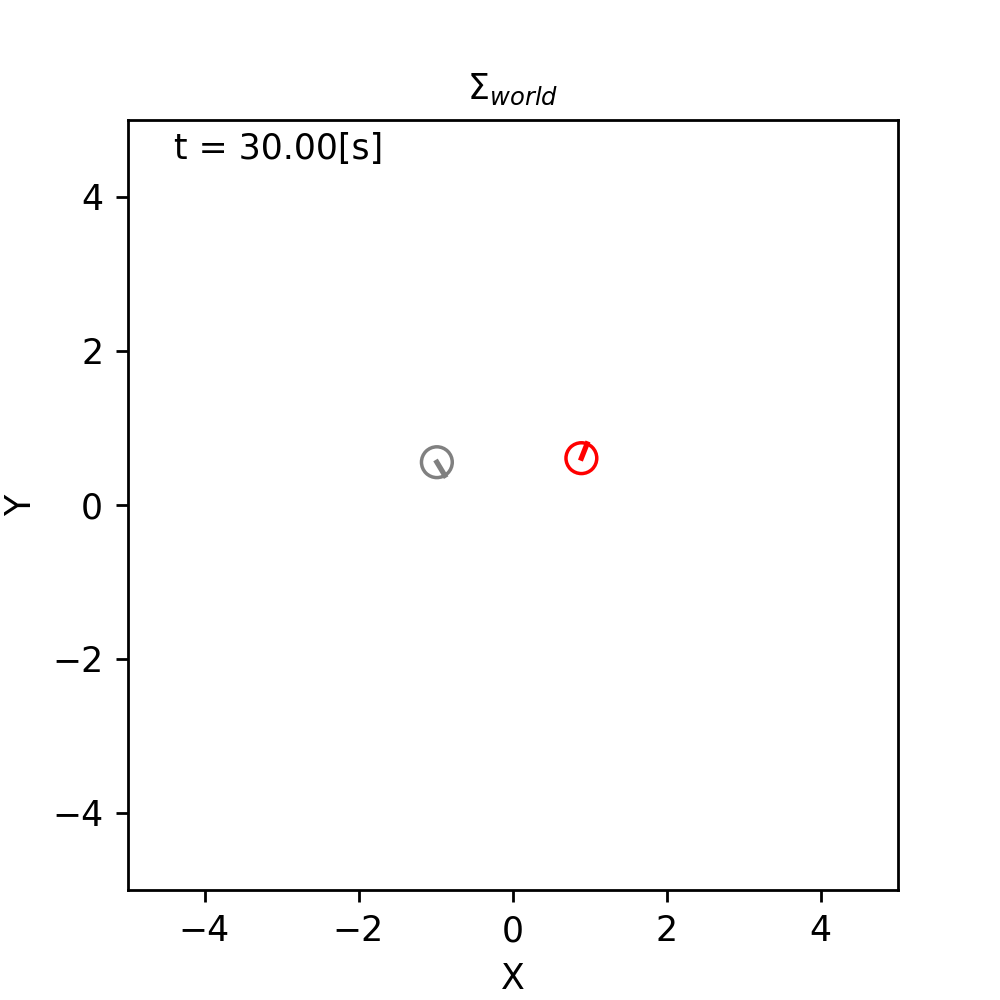

In [3]:
import copy  ###compare_nobias_bias###

world = World(30.1, 0.1) 

circling = Agent(0.2, 10.0/180*math.pi)    
nobias_robot = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="gray")
world.append(nobias_robot)
biased_robot = RandomRobot( np.array([0, 0, 0]).T, sensor=None, agent=circling, 
                           color="red", noise_prob=0.0 , bias_rates=(0.2,0.2))
world.append(biased_robot)

world.draw()